<a href="https://colab.research.google.com/github/rafaelherbster/Alura-Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [46]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [5]:
lista = [loja, loja2, loja3, loja4]

In [60]:
def faturar(lojas: list) -> pd.DataFrame:
    """
    Calcula o faturamento total de cada loja com base na coluna 'Preço' e 'Frete'
     de cada DataFrame em uma lista e imprime o resultado para cada uma.
    --------

    Parâmetros
    ----------
    lojas : list of pd.DataFrame
        Lista contendo objetos pandas DataFrame, onde cada DataFrame representa
        uma loja e deve conter a coluna 'Preço' com valores numéricos.

    Retorno
    -------
    str
        Uma tabela do tipo pd.DataFrame contendo o faturamento de cada loja
        formatado em reais.
        Também inclui uma mensagem de encerramento ao final.

    Exceções
    --------
    TypeError
        É tratado caso o parâmetro lojas não seja uma lista de DataFrames ou
        esteja mal formatado.

    KeyError
        É tratado caso a coluna 'Preço' não esteja presente em algum DataFrame.

    Observações
    -----------
    - A função retorna uma tabela do tipo pd.DataFrame especificando o valor
     do faturamento de cada iterável da lista do tipo list of pd.DataFrame.

    Todos os direitos reservados. Rafael Herbster de Sena Maciel. 2025.
    """
    try:
        faturamento = []
        for i, loja in enumerate(lojas):
            soma = (loja['Preço'] + loja['Frete'].round(2)).sum().round(2)
            faturamento.append({
                "Loja": f"Loja {i+1}",
                "Faturamento": soma  # valor numérico
            })

        df_fat = pd.DataFrame(faturamento)
        # Cálculos com valores numéricos
        total = df_fat["Faturamento"].sum()
        df_fat["%"] = ((df_fat["Faturamento"] / total) * 100).round(2)
        df_fat["Acumulado"] = df_fat["Faturamento"].cumsum()
        df_fat["%Acumulado"] = ((df_fat["Acumulado"] / total) * 100).round(2)

    except TypeError as te:
        return f"Erro: {te}, você precisa enviar uma lista no formato CSV ou um DataFrame."
    except KeyError as ke:
        return f"Erro: {ke}, a coluna 'Preço' não está presente em algum DataFrame."

    else:
        return df_fat


In [61]:
#Analise de faturamento da lista de lojas disponibilizadas
faturar(lista)

,Loja,Faturamento,%,Acumulado,%Acumulado
0,Loja 1,1616346.99,26.14,1616346.99,26.14
1,Loja 2,1567773.29,25.35,3184120.28,51.49
2,Loja 3,1542047.52,24.93,4726167.80,76.42
3,Loja 4,1458253.56,23.58,6184421.36,100.00


# 2. Vendas por Categoria


In [8]:
def vendas_categoria(lojas: list) -> pd.DataFrame:
    """
    Gera uma tabela com a contagem de vendas por categoria de produto para cada loja.

    Parâmetros
    ----------
    lojas : list of pd.DataFrame
        Lista contendo DataFrames, onde cada um representa uma loja e
        deve possuir a coluna 'Categoria do Produto'.

    Retorno
    -------
    pd.DataFrame
        Retorna uma tabela do tipo pd.DataFrame com as categorias como linhas e
        cada loja como coluna, contendo o número de vendas por categoria.

    Exceções
    --------
    TypeError
        É tratado caso o parâmetro `lojas` não seja uma lista de DataFrames ou
        esteja mal formatado.

    KeyError
        É tratado caso a coluna 'Categoria do Produto' não esteja presente em
        algum DataFrame.

    Observações
    -----------
    - A função retorna uma ma tabela do tipo pd.DataFrame de contagem de vendas
    por categoria.

    Todos os direitos reservados. Rafael Herbster de Sena Maciel. 2025.
    """
    try:
        tabelas = []
        for i, loja in enumerate(lista):
            contagem = loja['Categoria do Produto'].value_counts()
            contagem.name = f'Loja {i+1}'
            tabelas.append(contagem)
        resultado = pd.concat(tabelas, axis=1).fillna(0).astype(int)
        df_resultado = pd.DataFrame(resultado)
    except TypeError as te:
        return f"Erro: {te}. Você precisa enviar uma lista no formato CSV ou um DataFrame."
    except KeyError as ke:
        return f"Erro: {ke}. Certifique-se de que todos os DataFrames possuem a coluna 'Categoria do Produto'."
    else:
        return df_resultado


In [102]:
#Analise de vendas por categoria da lista de lojas disponibilizadas
vendas_categoria(lista)

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


# 3. Média de Avaliação das Lojas

In [10]:
def media_avaliacao(lojas: list) -> pd.DataFrame:
    """
    Calcula a média de avaliação para cada loja e retorna uma tabela com os resultados.

    Parâmetros
    ----------
    lojas : list of pd.DataFrame
        Lista contendo objetos pandas DataFrame, onde cada DataFrame representa
        uma loja e deve conter a coluna Avaliação da compra.

    Retorno
    -------
    pd.DataFrame
        Retorna uma tabela do tipo pd.DataFrame contendo a média de avaliação de
        cada loja.

    Exceções
    --------
    TypeError
        É tratado caso o parâmetro `lojas` não seja uma lista de DataFrames ou
        esteja mal formatado.

    KeyError
        É tratado caso a coluna Avaliação da compra não esteja presente em algum DataFrame.

    Observações
    -----------
    - A função retorna uma tabela do tipo pd.DataFrame especificando a média de
    avaliação de cada iterável da lista do tipo list of pd.DataFrame.

    Todos os direitos reservados. Rafael Herbster de Sena Maciel. 2025.
    """
    try:
        medias = []
        for i, loja in enumerate(lojas):
            media = loja["Avaliação da compra"].mean()
            medias.append({
                "Loja": f"Loja {i+1}",
                "Media": media
            })

        df_medias = pd.DataFrame(medias)
        df_medias["Media"] = df_medias["Media"].round(2)

    except TypeError as te:
        return f"Erro: {te}, você precisa enviar uma lista no formato CSV ou um DataFrame."
    except KeyError as ke:
        return f"Erro: {ke}, a coluna Avaliação da compra não está presente em algum DataFrame."
    else:
        return df_medias

In [22]:
media_avaliacao(lista)

,Loja,Media
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


# 4. Produtos Mais e Menos Vendidos

In [12]:
def max_vendidos(lojas: list) -> pd.DataFrame:
    """
    Retorna uma tabela com os produtos mais vendidos de cada loja.

    Parâmetros
    ----------
    lojas : list of pd.DataFrame
        Lista contendo objetos pandas DataFrame, onde cada DataFrame representa
        uma loja e deve conter a coluna 'Produto'.

    Retorno
    -------
    pd.DataFrame
        Retorna uma tabela do tipo pd.DataFrame contendo os produtos mais
        vendidos de cada loja.

    Exceções
    --------
    TypeError
        É tratado caso o parâmetro `lojas` não seja uma lista de Data
        Frames ou esteja mal formatado.

    KeyError
        É tratado caso a coluna 'Produto' não esteja presente em algum DataFrame.

    Observações
    -----------
    - A função retorna uma tabela do tipo pd.DataFrame especificando os produtos
    mais vendidos de cada iterável da lista do tipo list of pd.DataFrame.

    Todos os direitos reservados. Rafael Herbster de Sena Maciel. 2025.
    """
    try:
        produtos = []

        for i, loja in enumerate(lojas):
            contagem = loja['Produto'].value_counts()
            mais_vendido = contagem.idxmax()

            produtos.append({
                "Loja": f"Loja {i+1}",
                "Produto Mais Vendido": mais_vendido,
                "Categoria": loja.loc[loja['Produto'] == mais_vendido, 'Categoria do Produto'].iloc[0],
                "Qtd_max": contagem.max(),
            })


    except TypeError as te:
        return f"Erro: {te}, você precisa enviar uma lista no formato CSV ou um DataFrame."
    except KeyError as ke:
        return f"Erro: {ke}, a coluna Produto da compra não está presente em algum DataFrame."
    else:
        return pd.DataFrame(produtos)


In [13]:
max_vendidos(lista)

,Loja,Produto Mais Vendido,Categoria,Qtd_max
0,Loja 1,Micro-ondas,eletrodomesticos,60
1,Loja 2,Iniciando em programação,livros,65
2,Loja 3,Kit banquetas,moveis,57
3,Loja 4,Cama box,moveis,62


In [14]:
def min_vendidos(lojas: list) -> pd.DataFrame:
    """
    Retorna uma tabela com os produtos menos vendidos de cada loja.

    Parâmetros
    ----------
    lojas : list of pd.DataFrame
        Lista contendo objetos pandas DataFrame, onde cada
        DataFrame representa uma loja e deve conter a coluna 'Produto'.

    Retorno
    -------
    pd.DataFrame
        Retorna uma tabela do tipo pd.DataFrame contendo os produtos menos
        vendidos de cada loja.

    Exceções
    --------
    TypeError
        É tratado caso o parâmetro `lojas` não seja uma lista de DataFrames ou
        esteja mal formatado.

    KeyError
        É tratado caso a coluna 'Produto' não esteja presente em algum DataFrame.

    Observações
    -----------
    - A função retorna uma tabela do tipo pd.DataFrame especificando os produtos
    menos vendidos de cada iterável da lista do tipo list of pd.DataFrame.

    Todos os direitos reservados. Rafael Herbster de Sena Maciel. 2025.
    """
    try:
        produtos = []

        for i, loja in enumerate(lojas):
            contagem = loja['Produto'].value_counts()
            menos_vendido = contagem.idxmin()

            produtos.append({
                "Loja": f"Loja {i+1}",
                "Produto Menos Vendido": menos_vendido,
                "Categoria": loja.loc[loja['Produto'] == menos_vendido, 'Categoria do Produto'].iloc[0],
                "Qtd_max": contagem.min(),
            })


    except TypeError as te:
        return f"Erro: {te}, você precisa enviar uma lista no formato CSV ou um DataFrame."
    except KeyError as ke:
        return f"Erro: {ke}, a coluna Produto da compra não está presente em algum DataFrame."
    else:
        return pd.DataFrame(produtos)

In [15]:
min_vendidos(lista)

,Loja,Produto Menos Vendido,Categoria,Qtd_max
0,Loja 1,Headset,eletronicos,33
1,Loja 2,Jogo de tabuleiro,brinquedos,32
2,Loja 3,Blocos de montar,brinquedos,35
3,Loja 4,Guitarra,instrumentos musicais,33


# 5. Frete Médio por Loja


In [41]:
def media_frete(lojas: list) -> pd.DataFrame:
    """
    Calcula a média de frete para cada `loja` e retorna uma tabela com os resultados.

    Parâmetros
    ----------
    lojas : list of pd.DataFrame
        Lista contendo objetos pandas DataFrame, onde cada DataFrame representa
        uma loja e deve conter a coluna 'Frete'.

    Retorno
    -------
    pd.DataFrame
        Retorna uma tabela do tipo pd.DataFrame contendo a média de frete de cada
        loja.

    Exceções
    --------
    TypeError
        É tratado caso o parâmetro `lojas` não seja uma lista de DataFrames ou
        esteja mal formatado.

    KeyError
        É tratado caso a coluna 'Frete' não esteja presente em algum DataFrame.

    Observações
    -----------
    - A função retorna uma tabela do tipo pd.DataFrame especificando a média de
    frete de cada iterável da lista do tipo list of pd.DataFrame.

    Todos os direitos reservados. Rafael Herbster de Sena Maciel. 2025.
    """
    try:
        medias = []
        for i, loja in enumerate(lojas):
            media = loja["Frete"].mean()
            medias.append({
                "Loja": f"Loja {i+1}",
                "Media": media
            })

        df_medias = pd.DataFrame(medias)
        df_medias["Media"] = df_medias["Media"].round(2)


    except TypeError as te:
        return f"Erro: {te}, você precisa enviar uma lista no formato CSV ou um DataFrame."
    except KeyError as ke:
        return f"Erro: {ke}, a coluna Frete não está presente em algum DataFrame."

    else:
        return df_medias

In [17]:
media_frete(lista)

,Loja,Média
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


#6. Ticket Médio

In [77]:
def ticketMedio(lojas: list) -> pd.DataFrame:
    """
    Calcula ticket medio para cada `loja` e retorna uma tabela com os resultados.

    Parâmetros
    ----------
    lojas : list of pd.DataFrame
        Lista contendo objetos pandas DataFrame, onde cada DataFrame representa
        uma loja e deve conter a coluna 'Frete'.

    Retorno
    -------
    pd.DataFrame
        Retorna uma tabela do tipo pd.DataFrame contendo o ticket medio de cada
        loja.

    Exceções
    --------
    TypeError
        É tratado caso o parâmetro `lojas` não seja uma lista de DataFrames ou
        esteja mal formatado.

    KeyError
        É tratado caso a coluna 'Frete' não esteja presente em algum DataFrame.

    Observações
    -----------
    - A função retorna uma tabela do tipo pd.DataFrame especificando o ticket medio
    de cada iterável da lista do tipo list of pd.DataFrame.

    Todos os direitos reservados. Rafael Herbster de Sena Maciel. 2025.
    """
    try:
        faturamento = faturar(lojas)
        medias = []
        for i, loja in enumerate(lojas):
            media = faturamento['Faturamento'][i] / loja['Vendedor'].count()
            media = media.round(2)
            medias.append({
                "Loja": f"Loja {i+1}",
                "Media": media
            })

        df_medias = pd.DataFrame(medias)
        df_medias["Media"] = df_medias["Media"].round(2)


    except TypeError as te:
        return f"Erro: {te}, você precisa enviar uma lista no formato CSV ou um DataFrame."
    except KeyError as ke:
        return f"Erro: {ke}, a coluna Frete não está presente em algum DataFrame."

    else:
        return df_medias

In [78]:
ticketMedio(lista)

,Loja,Media
0,Loja 1,685.18
1,Loja 2,664.59
2,Loja 3,653.69
3,Loja 4,618.43


#7. Total de vendas por loja

In [99]:
def totalVendas(lojas: list) -> pd.DataFrame:
    """
    Calcula o total de vendas para cada `loja` e retorna uma tabela com os resultados.

    Parâmetros
    ----------
    lojas : list of pd.DataFrame
        Lista contendo objetos pandas DataFrame, onde cada DataFrame representa
        uma loja e deve conter a coluna 'Frete'.

    Retorno
    -------
    pd.DataFrame
        Retorna uma tabela do tipo pd.DataFrame contendo o total de vendas de cada
        loja.

    Exceções
    --------
    TypeError
        É tratado caso o parâmetro `lojas` não seja uma lista de DataFrames ou
        esteja mal formatado.

    KeyError
        É tratado caso a coluna 'Vendedor' não esteja presente em algum DataFrame.

    Observações
    -----------
    - A função retorna uma tabela do tipo pd.DataFrame especificando o ticket medio
    de cada iterável da lista do tipo list of pd.DataFrame.

    Todos os direitos reservados. Rafael Herbster de Sena Maciel. 2025.
    """
    try:
        vendas = []
        for i, loja in enumerate(lojas):
            venda = loja['Vendedor'].count()
            vendas.append({
                "Loja": f"Loja {i+1}",
                "Vendas": venda
            })

        df_vendas = pd.DataFrame(vendas)


    except TypeError as te:
        return f"Erro: {te}, você precisa enviar uma lista no formato CSV ou um DataFrame."
    except KeyError as ke:
        return f"Erro: {ke}, a coluna Frete não está presente em algum DataFrame."

    else:
        return df_vendas

In [100]:
totalVendas(lista)

,Loja,Vendas
0,Loja 1,2359
1,Loja 2,2359
2,Loja 3,2359
3,Loja 4,2358


#8. Gráficos

In [79]:
import matplotlib.pyplot as plt

In [80]:
def grafico_faturamento(lista: list)->None:
    """
    Gera um gráfico de pizza com o percentual de faturamento de cada loja.

    Args:
        lista (list): Lista de DataFrames com a coluna 'Preço' em cada um.

    Returns:
        None: Apenas exibe o gráfico.
    """
    faturamentos = faturar(lista)

    # Extrai os valores numéricos
    valores = faturamentos['Faturamento']
    lojas = faturamentos['Loja']
    total = valores.sum()

    # Função para mostrar % e valor monetário em cada fatia
    def formatar_autopct(pct):
        valor = pct * total / 100
        return f'{pct:.1f}%\n(R$ {valor:,.2f})'.replace('.', '#').replace(',', '.').replace('#', ',')

    # Plot do gráfico
    plt.figure(figsize=(6, 6))
    plt.pie(
        valores,
        labels=lojas,
        autopct=formatar_autopct,
        startangle=90
    )
    plt.title(f'Percentual de faturamento por loja\n(em relação ao total de R$ {total:,.2f})'.replace('.', '#').replace(',', '.').replace('#', ','))
    plt.tight_layout()
    plt.show()



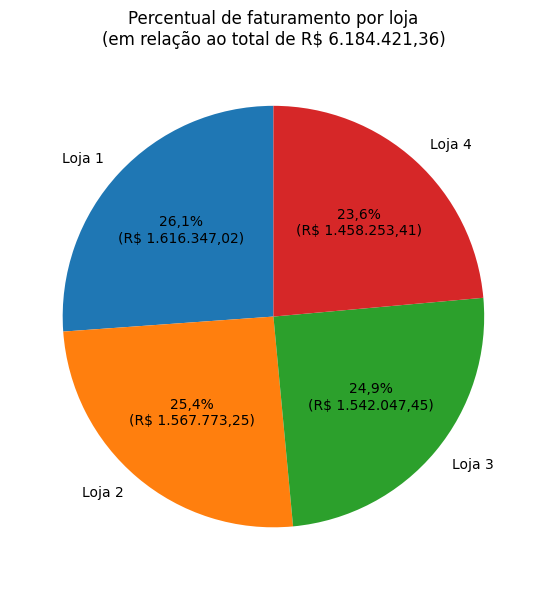

In [81]:
grafico_faturamento(lista)

In [82]:
def grafico_med_avalicao(lista: list) -> None:
    """
    Gera um gráfico de pontos (Dot plot) com a média de avaliação de cada loja.

    Args:
        lista (list): Lista de DataFrames com a coluna 'Avaliação da compra' em cada um.

    Returns:
        None: Apenas exibe o gráfico.
    """
    med_av = media_avaliacao(lista)
    valores = med_av['Media']
    lojas = med_av['Loja']

    plt.figure(figsize=(6, 6))
    plt.plot(lojas, valores, 'o', color='blue')  # pontos no eixo horizontal
    plt.ylabel('Média de Avaliação')
    plt.title('Média de Avaliação por Loja')
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


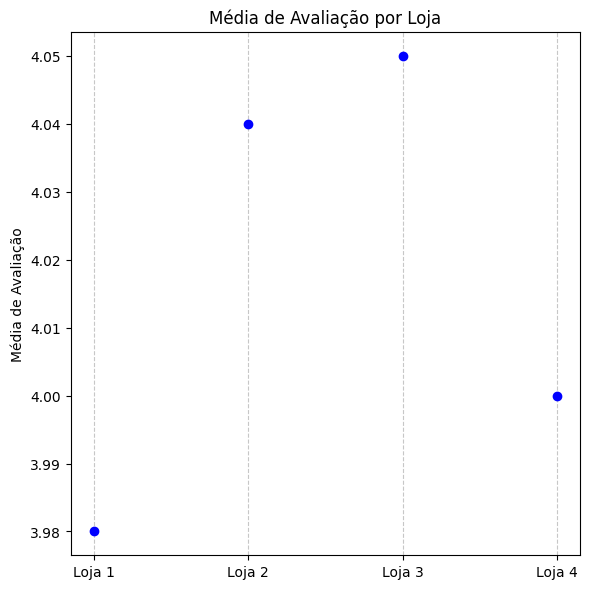

In [83]:
grafico_med_avalicao(lista)

In [87]:
def grafico_med_frete(lista: list) -> None:
    """
    Gera um gráfico de pontos (Dot plot) com a média do custo de frete de cada loja.

    Args:
        lista (list): Lista de DataFrames com a coluna 'Frete' em cada um.

    Returns:
        None: Apenas exibe o gráfico.
    """
    med_fr = media_frete(lista)
    valores = med_fr['Media']
    lojas = med_fr['Loja']

    plt.figure(figsize=(6, 6))
    plt.plot(lojas, valores, 'o', color='blue')  # pontos no eixo horizontal
    plt.ylabel('Média de Frete')
    plt.title('Média de Frete por Loja')
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

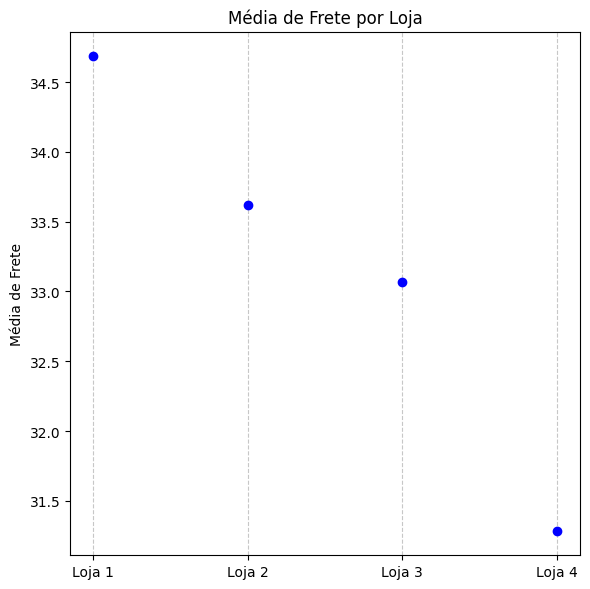

In [88]:
grafico_med_frete(lista)

In [95]:
def grafico_ticketMedio(lista: list) -> None:
    """
    Gera um gráfico de barras com o ticket medio de cada loja.

    Args:
        lista (list): Lista de DataFrames com a coluna 'Frete' em cada um.

    Returns:
        None: Apenas exibe o gráfico.
    """
    tk_med = ticketMedio(lista)
    valores = tk_med['Media']
    lojas = tk_med['Loja']

    plt.figure(figsize=(6, 6))
    plt.bar(lojas, valores, color='blue')  # pontos no eixo horizontal
    plt.ylabel('Ticket Médio')
    plt.title('Ticket médio por Loja')
    plt.tight_layout()
    plt.show()

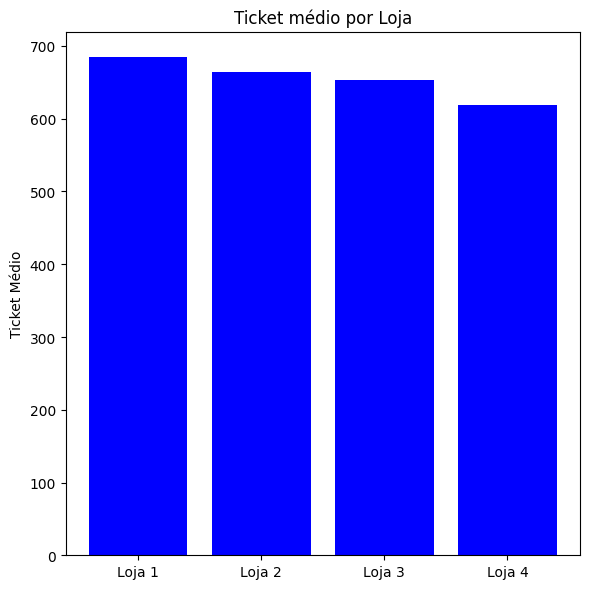

In [96]:
grafico_ticketMedio(lista)

# Relatório de Análise de Desempenho das Lojas

## Introdução
Este relatório tem como objetivo auxiliar o Sr. João na decisão de qual loja deve ser liquidada para levantar capital para um novo investimento. Foram analisados diversos indicadores de desempenho das quatro lojas, incluindo faturamento, vendas por categoria, avaliação dos clientes, produtos mais e menos vendidos, frete médio, ticket médio e total de vendas.

## Metodologia
Os dados foram coletados de quatro lojas (Loja 1, Loja 2, Loja 3 e Loja 4) e analisados utilizando Python e a biblioteca Pandas. Foram criadas funções específicas para calcular cada métrica de desempenho, garantindo consistência e precisão nas análises.

## Análise dos Resultados

### 1. Faturamento Total
- **Loja 1**: R\$ 1.616.346,99 (26,14% do total)
- **Loja 2**: R\$ 1.567.773,29 (25,35% do total)
- **Loja 3**: R\$ 1.542.047,52 (24,93% do total)
- **Loja 4**: R\$ 1.458.253,56 (23,58% do total)

**Observação**: A Loja 4 apresenta o menor faturamento total, contribuindo com apenas 23,58% do faturamento combinado das quatro lojas.

### 2. Vendas por Categoria
- **Moveis**: Loja 3 (499 vendas) e Loja 4 (480 vendas)
- **Eletrônicos**: Loja 1 (448 vendas) e Loja 4 (451 vendas)
- **Brinquedos**: Loja 4 (338 vendas)
- **Eletrodomésticos**: Loja 4 (254 vendas, a menor entre todas)

**Observação**: A Loja 4 tem desempenho variável por categoria, com destaque negativo em eletrodomésticos.

### 3. Média de Avaliação dos Clientes
- **Loja 1**: 3,98
- **Loja 2**: 4,04
- **Loja 3**: 4,05
- **Loja 4**: 4,00

**Observação**: A Loja 1 tem a menor média de avaliação, embora todas estejam próximas.

### 4. Produtos Mais Vendidos
- **Loja 1**: Micro-ondas (60 vendas)
- **Loja 2**: Livro "Iniciando em programação" (65 vendas)
- **Loja 3**: Kit banquetas (57 vendas)
- **Loja 4**: Cama box (62 vendas)

### 5. Produtos Menos Vendidos
- **Loja 1**: Headset (33 vendas)
- **Loja 2**: Jogo de tabuleiro (32 vendas)
- **Loja 3**: Blocos de montar (35 vendas)
- **Loja 4**: Guitarra (33 vendas)

**Observação**: A Loja 2 tem o produto menos vendido (Jogo de tabuleiro com 32 vendas).

### 6. Frete Médio
- **Loja 1**: R\$ 34,69
- **Loja 2**: R\$ 33,62
- **Loja 3**: R\$ 33,07
- **Loja 4**: R\$ 31,28

**Observação**: A Loja 4 tem o menor frete médio, o que pode indicar eficiência logística ou localização vantajosa.

### 7. Ticket Médio
- **Loja 1**: R\$ 685,18
- **Loja 2**: R\$ 664,59
- **Loja 3**: R\$ 653,69
- **Loja 4**: R\$ 618,43

**Observação**: A Loja 4 tem o menor ticket médio, indicando que os clientes gastam menos por compra.

### 8. Total de Vendas
- **Loja 1**: 2359 vendas
- **Loja 2**: 2359 vendas
- **Loja 3**: 2359 vendas
- **Loja 4**: 2358 vendas

**Observação**: A Loja 4 tem uma venda a menos que as outras, diferença insignificante.

## Conclusão e Recomendação
Com base nos dados analisados, a **Loja 4** se destaca negativamente em vários indicadores:
- **Menor faturamento total** (23,58% do total).
- **Menor ticket médio** (R\$ 618,43), indicando menor valor por venda.
- **Desempenho inferior em categorias como eletrodomésticos** (254 vendas, a menor entre todas).

Apesar de ter o **menor frete médio**, o que pode ser um ponto positivo, os demais indicadores sugerem que a Loja 4 é a menos lucrativa. Portanto, recomenda-se que o Sr. João considere liquidar a **Loja 4** para levantar capital para o novo investimento, mantendo as outras três lojas que apresentam desempenho superior.

## Considerações Finais
Antes de tomar a decisão final, sugere-se uma análise adicional sobre custos fixos e variáveis de cada loja, bem como a localização e potencial de crescimento. No entanto, com os dados disponíveis, a Loja 4 é a candidata mais adequada para liquidação.